<a href="https://colab.research.google.com/github/Neo-glitch/computer-vision-masterclass/blob/main/Neural_Networks_for_Image_clf(Simpsons_Homer_or_Bart_Clf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* N.B: This isn't optimal since normally working with ImageData requires CNN and not just NN

* Aim is to classify uf image is Homer or Bart

### Approach 1: Using all image pixels without feature extraction and using it to train the NN

In [1]:
 # mount gDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Extracting Features

In [3]:
# extract file
path = "/content/drive/MyDrive/Computer Vision Masterclass Files/Datasets/homer_bart_1.zip"

zip_object = zipfile.ZipFile(path, "r")
zip_object.extractall('./')   # extract this file in current dir
zip_object.close()

In [4]:
directory = "/content/homer_bart_1"
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]  # gets full name of files

# print(files)

In [5]:
height, width = 128, 128

In [6]:
images = []  # stores flatten image to be used as input
classes = [] # to store classes

In [7]:
for image_path in files:

  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]

  except:
    print("Not an image File")
    continue


  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = image.ravel()  # returns flatten view of original array, could have used .flatten

  images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))  # gets the image file name and extension attached
  if image_name.startswith("b"):
    class_name = 0  # BART
  else:
    class_name = 1  # HOMER

  classes.append(class_name)




Not an image File


In [8]:
type(images), type(classes)

(list, list)

In [9]:
# transform list to np arrays
x = np.asarray(images)
y = np.asarray(classes)

type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
x.shape, y.shape

((269, 16384), (269,))

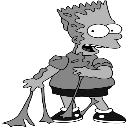

In [11]:
cv2_imshow(x[0].reshape(width, height))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), array([160, 109]))

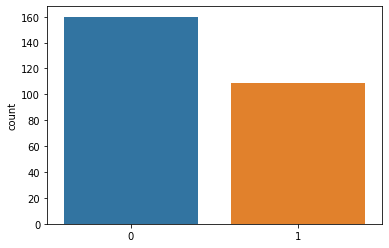

In [12]:
# to get info about occurence of classes
sns.countplot(y);

# number of class instances
np.unique(y, return_counts=True)

In [13]:
# Normalizing

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)   # could have just done x/255.0

x.max(), x.min()

(1.0000000000000002, 0.0)

#### Training and Test set

In [14]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((215, 16384), (215,), (54, 16384), (54,))

#### Building Model and Evaluation

In [15]:
# using rule of thumb for neurons in hidden layer i.e input neurons + output neurons / 2 = number of neurons in hidden layer
# (16384 + 2) / 2 = 8193 neurons

model = keras.models.Sequential([
              keras.layers.Dense(input_shape = (16384,), units = 8193, activation ="relu"),
              keras.layers.Dense(units = 4097, activation ="relu"),
              keras.layers.Dense(units = 8193, activation ="relu"),
              keras.layers.Dense(units = 1, activation ="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 4097)              33570818  
                                                                 
 dense_2 (Dense)             (None, 8193)              33574914  
                                                                 
 dense_3 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,396,231
Trainable params: 201,396,231
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [17]:
history = model.fit(x_train, y_train, epochs = 55, validation_data = (x_test, y_test))

Epoch 1/55
7/7 [==============================] - 2s 84ms/step - loss: 124.7388 - accuracy: 0.5070 - val_loss: 27.3993 - val_accuracy: 0.5185
Epoch 2/55
7/7 [==============================] - 0s 51ms/step - loss: 10.7436 - accuracy: 0.5023 - val_loss: 3.5080 - val_accuracy: 0.5185
Epoch 3/55
7/7 [==============================] - 0s 51ms/step - loss: 1.2374 - accuracy: 0.5395 - val_loss: 0.8373 - val_accuracy: 0.4815
Epoch 4/55
7/7 [==============================] - 0s 50ms/step - loss: 0.7256 - accuracy: 0.5628 - val_loss: 0.8723 - val_accuracy: 0.5185
Epoch 5/55
7/7 [==============================] - 0s 51ms/step - loss: 0.6989 - accuracy: 0.5721 - val_loss: 0.6946 - val_accuracy: 0.5185
Epoch 6/55
7/7 [==============================] - 0s 51ms/step - loss: 0.7016 - accuracy: 0.6140 - val_loss: 0.6918 - val_accuracy: 0.5185
Epoch 7/55
7/7 [==============================] - 0s 51ms/step - loss: 0.6866 - accuracy: 0.5395 - val_loss: 0.7577 - val_accuracy: 0.5185
Epoch 8/55
7/7 [=======

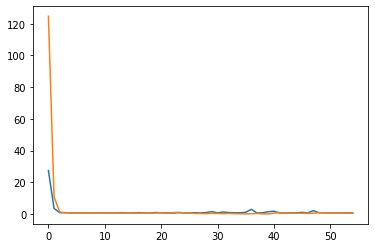

In [18]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])


In [19]:
# predictions

predictions = model.predict(x_test)

predictions.shape

(54, 1)

In [20]:
# threshold = 0.5 
# 0 - False i.e Bart
# 1 - True i.e Homer

predictions = [predictions > 0.5]

y_test.shape

(54,)

In [21]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

y_pred = np.array(predictions).flatten()

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")



accuracy: 0.5185185185185185
f1_score: 0.0
recall_score: 0.0
precision_score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


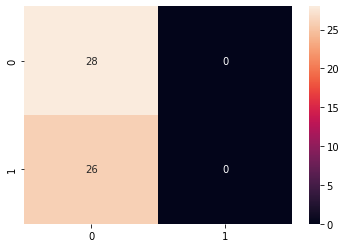

In [22]:
from sklearn.metrics import confusion_matrix

# row is actual, while column is predicted.
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True)

#### Saving and Loading Model

In [23]:
model_json = model.to_json()

# save just model structure alone
with open("model1.json", "w") as json_file:
  json_file.write(model_json)

# save model weights
from keras.models import save_model

model_saved = save_model(model, "model_weights.hdf5")



# n.b: This doesn't save the model optimizer(best to save the model structure and weights in one go on keras to get these)

In [24]:
# Load model structure and weights


with open("model1.json", "r") as json_file:
  json_saved_model = json_file.read()

model1_loaded = keras.models.model_from_json(json_saved_model)   # load the structure
model1_loaded.load_weights("/content/weights.hdf5")

# optimizer must be same as saved model
model1_loaded.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

model1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 4097)              33570818  
                                                                 
 dense_2 (Dense)             (None, 8193)              33574914  
                                                                 
 dense_3 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,396,231
Trainable params: 201,396,231
Non-trainable params: 0
_________________________________________________________________


### Classify a single image

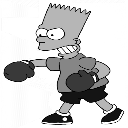

In [25]:
# get test image first in format before flattening and pixel normalization
# for displaying
test_image = x_test[44]
test_image = scaler.inverse_transform(test_image.reshape(1, -1))

cv2_imshow(test_image.reshape(128, 128))

In [26]:
# classfification
if (model1_loaded.predict(x_test[44].reshape(1,-1))[0][0] < 0.5):
  print("Predictions: Bart with class 0")
else:
  print("Predictions: Homer with class 1")

Predictions: Bart with class 0


### Approach 2: Using Extracted Features(Using OpenCV) to train NN

* N.B: When using CNN this feature extraction isn't that important, since CNN handles extracting features

### Feature Extractor

In [27]:
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]  # gets full name of files
print(files)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [57]:
# name of each features for homer and bart i.e first three for Homer and next three for bart and last is class(0 or 1)
# This are the headers for our features dataset
export = "mouth,pants,shoes,tshirt,shorts,sneakers,class\n"

In [58]:
show_images = False
features = []

In [59]:
for image_path in files:
  try:
    original_image = cv2.imread(image_path)
    (H, W) = original_image.shape[:2]

  except:
    print("not an image")
    continue

  image = original_image.copy()
  image_features = []  # features of just this image

  mouth = pants = shoes = 0  # init homer features as 0
  tshirt = shorts = sneakers = 0  # init bart features as 0

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith("b"):
    class_name = 0
  else:
    class_name = 1

  # iterate through each one of the pixels in image to get needed features
  for height in range(0, H):
    # iterate through each pixel row in image
    for width in range(0, W):
      # iterate through each pixel col of pixel row in focus
      blue = image.item(height, width, 0)
      green = image.item(height, width, 1)
      red = image.item(height, width, 2)

      # Homer Features - brown mouth
      if(blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >= 175 and red <= 200):
        image[height, width] = [0, 255, 255]  # after finding brown color, paint that pixel to yellow by setting B = 0 and G&R channels to 255
        mouth += 1
      
      # Homer - blue pants
      if(blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
        image[height, width] = [0, 255, 255]
        pants += 1

      # Homer - gray shoes
      if height > (H / 2):  # to access just bottom half of the image
        if(blue >= 35 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
          image[height, width] = [0, 255, 255]
          shoes += 1

      # Bart - Orange t-shirt
      if(blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
        image[height, width] = [0, 255, 128]
        tshirt += 1

      # Bart - Blue shorts
      if(blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
        image[height, width] = [0, 255, 128]
        shorts += 1

      # Bart - Blue sneakers
      if height > (H / 2):  # to access just bottom half of the image
        if(blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
          image[height, width] = [0, 255, 128]
          sneakers += 1


  # scale the feature and get percentage, since all images aren't same size
  mouth = round((mouth / (H * W)) * 100, 9)
  pants = round((pants / (H * W)) * 100, 9)
  shoes = round((shoes / (H * W)) * 100, 9)
  tshirt = round((tshirt / (H * W)) * 100, 9)
  shorts = round((shorts / (H * W)) * 100, 9)
  sneakers = round((sneakers / (H * W)) * 100, 9)


  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(tshirt)
  image_features.append(shorts)
  image_features.append(sneakers)
  image_features.append(class_name)


  features.append(image_features)

  # print("Homer mouth : %s - Homer pants: %s - Homer shoes: %s" % (image_features[0], image_features[1], image_features[2]))
  # print("Bart t-shirt: %s - Bart Shorts: %s - Bart Shoes: %s" % (image_features[3], image_features[4], image_features[5]))

  # conv a features list into strings
  f = (",".join([str(item) for item in image_features]))
  export += f + "\n"
  

  if(show_images):
    # convert to needed color channel for showing using plt
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    fig, im = plt.subplots(1, 2)
    im[0].axis("Off")
    im[0].imshow(original_image)
    im[1].axis("off")
    im[1].imshow(image)
    plt.show();

      





not an image


In [60]:
export

'mouth,pants,shoes,tshirt,shorts,sneakers,class\n0.0,0.0,0.043821209,6.886101887,3.495204355,3.495204355,0\n0.0,0.0,0.053466686,5.004901113,3.183888705,3.183888705,0\n0.0,0.0,0.0,5.264620437,5.029682961,5.029682961,0\n0.0,0.480168257,0.023148607,0.0,0.0,0.0,0\n0.0,0.0,0.029707562,8.978929368,3.459119497,3.459119497,0\n0.0,0.0,0.035536603,6.75432362,0.948827292,0.948827292,0\n0.249585206,0.0,0.0,9.693407263,4.104683977,4.104683977,0\n0.0,0.0,0.088590604,0.0,0.0,0.0,0\n0.0,0.0,0.077375566,0.0,0.0,0.0,0\n0.0,0.0,0.069489045,9.594752524,7.522715548,7.522715548,0\n0.0,0.0,0.067226891,0.0,0.0,0.0,0\n0.0,0.0,0.012842275,19.545383481,0.0,0.0,0\n0.00307645,0.0,0.0,6.495154592,5.599138594,5.599138594,0\n0.001317263,0.0,0.026784342,0.0,0.0,0.0,0\n0.0,0.0,0.009407804,8.395721925,0.0,0.0,0\n0.02105732,0.0,0.0,8.915750471,0.0,0.0,0\n0.0,0.0,0.024106909,11.095816228,4.525111363,4.525111363,0\n0.0,0.0,0.011268875,10.443349754,3.183296307,3.183296307,0\n0.0,0.0,0.012320666,9.497408097,0.0,0.0,0\n0.0,0.

In [61]:
# save generated features to a csv file
with open("image_features.csv", "w") as file:
  for line in export:
    file.write(line)
file.closed

True

In [62]:
dataset = pd.read_csv("image_features.csv")

dataset.head(4)

,mouth,pants,shoes,tshirt,shorts,sneakers,class
0,0.0,0.000000,0.043821,6.886102,3.495204,3.495204,0
1,0.0,0.000000,0.053467,5.004901,3.183889,3.183889,0
2,0.0,0.000000,0.000000,5.264620,5.029683,5.029683,0
3,0.0,0.480168,0.023149,0.000000,0.000000,0.000000,0


### Train and Test Dataset split

In [63]:
x = dataset.iloc[:, 0:6].values

y = dataset["class"].values

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [68]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((215, 6), (215,), (54, 6), (54,))

### Building NN and Evaluation

In [70]:
model2 = keras.models.Sequential([
        keras.layers.Dense(input_shape = (6,), units = 4, activation = "relu"),
        keras.layers.Dense(units = 4, activation = "relu"),
        keras.layers.Dense(units = 4, activation = "relu"),
        keras.layers.Dense(units = 1, activation = "sigmoid")
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 28        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [72]:
model2.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

history = model2.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))

Epoch 1/50
7/7 [==============================] - 1s 46ms/step - loss: 0.6929 - accuracy: 0.6372 - val_loss: 0.6931 - val_accuracy: 0.5185
Epoch 2/50
7/7 [==============================] - 0s 13ms/step - loss: 0.6918 - accuracy: 0.6140 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.6140 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6899 - accuracy: 0.6140 - val_loss: 0.6923 - val_accuracy: 0.5185
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6892 - accuracy: 0.6140 - val_loss: 0.6921 - val_accuracy: 0.5185
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6883 - accuracy: 0.6140 - val_loss: 0.6919 - val_accuracy: 0.5185
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6876 - accuracy: 0.6140 - val_loss: 0.6913 - val_accuracy: 0.5185
Epoch 8/50
7/7 [==============

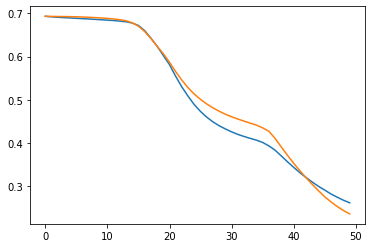

In [73]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show();

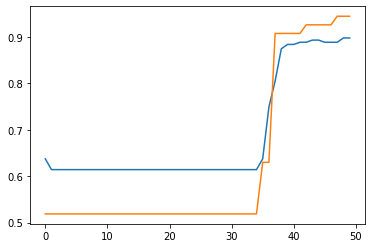

In [74]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show();

In [ ]:
predictions = model2.predict(x_test)
predictions = (predictions > 0.5)

accuracy: 0.9444444444444444
f1_score: 0.9411764705882353
recall_score: 0.9230769230769231
precision_score: 0.96


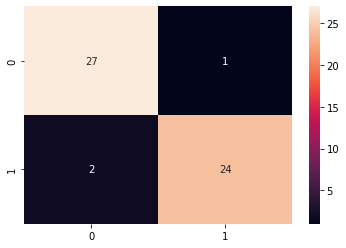

In [89]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

y_pred = predictions.reshape(-1)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")\

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True);

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.96      0.92      0.94        26

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54



### Saving and Loading the model to clf a single image

In [92]:
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
  json_file.write(model_json)

In [93]:
from keras.models import save_model
model2_saved = save_model(model2, "/content/model2_weights.hdf5")

In [97]:
# loads model structure and weights

with open("model2.json", "r") as json_file:
  json_saved_model = json_file.read()

model2_loaded = keras.models.model_from_json(json_saved_model)
model2_loaded.load_weights("model2_weights.hdf5")
model2_loaded.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])   # compilation params must be same as previosuly saved model

model2_loaded.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 28        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [101]:
test_image = x_test[33]
test_label = y_test[33]

test_image.shape

(6,)

In [102]:
# reshape image to batch format needed by nn
test_image = test_image.reshape(1, -1)

In [105]:
if(model2_loaded.predict(test_image)[0][0] < 0.5):
  print("Prediction: Bart")
  if(test_label == 0):
    print("Actual: Bart")
  else:
    print("Actual: Homer")
  
else:
  print("Prediction: Homer")
  if(test_label == 0):
    print("Actual: Bart")
  else:
    print("Actual: Homer")

Prediction: Homer
Actual: Homer
